In [1]:
import torch
from torch.autograd import Variable

In [2]:
def f(x: Variable) -> Variable:
    assert x.requires_grad
    return (2*x*torch.sign(x) + 1)*torch.sign(x)

def g(x: Variable) -> Variable:
    def g1d(x: Variable) -> Variable:
        if x.data[0] > 0:
            return 2*x + 1
        elif x.data[0] < 0:
            return 2*x - 1
        else:
            return 2*x
    assert x.requires_grad
    if x.dim() == 0:
        return 1*x    
    if x.size() == torch.Size([1]):
        return g1d(x)

    return torch.stack([g(sub_x) for sub_x in x])

In [3]:
import numpy as np

x = np.linspace(-3, 3, num=51, dtype=np.float32)

x_f = Variable(torch.from_numpy(x), requires_grad=True)
y_f = f(x_f)

x_g = Variable(torch.from_numpy(x), requires_grad=True)
y_g = g(x_g)

y_f.backward(torch.ones_like(y_f))
y_g.backward(torch.ones_like(y_g))

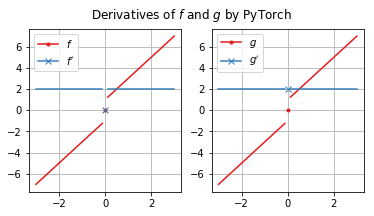

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(ax, x, y, label):
    positive = x.data.numpy() > 0
    negative = x.data.numpy() < 0
    zero = x.data.numpy() == 0
    
    ax.plot(x.data.numpy()[positive], y.data.numpy()[positive],
            c=plt.cm.Set1(0))
    ax.plot(x.data.numpy()[negative], y.data.numpy()[negative], c=plt.cm.Set1(0))
    ax.plot(x.data.numpy()[zero], y.data.numpy()[zero], '.-', c=plt.cm.Set1(0),
            label='${0}$'.format(label))
    
    ax.plot(x.data.numpy()[positive], x.grad.data.numpy()[positive],
            c=plt.cm.Set1(1))
    ax.plot(x.data.numpy()[negative], x.grad.data.numpy()[negative], c=plt.cm.Set1(1))
    ax.plot(x.data.numpy()[zero], x.grad.data.numpy()[zero], 'x-', c=plt.cm.Set1(1),
            label='${0}^\prime$'.format(label))
    
    ax.grid()
    ax.legend()
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,3))    
plot(ax1, x_f, y_f, label='f')
plot(ax2, x_g, y_g, label='g')
fig.suptitle('Derivatives of $f$ and $g$ by PyTorch')

fig.savefig('problem4.pdf', bbox_inches='tight')